In [645]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import LabelEncoder
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import pickle
import warnings; warnings.simplefilter('ignore')

# 1. Load dataset

In [646]:
df = pd.read_excel('Online Retail.xlsx')

In [647]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
315344,564726,22993,SET OF 4 PANTRY JELLY MOULDS,4,2011-08-28 12:29:00,1.25,18077.0,United Kingdom
78094,542806,22511,RETROSPOT BABUSHKA DOORSTOP,2,2011-02-01 11:20:00,3.75,12836.0,United Kingdom
162435,550500,21363,HOME SMALL WOOD LETTERS,1,2011-04-18 15:26:00,10.79,NaN,United Kingdom
196174,553830,21932,SCANDINAVIAN PAISLEY PICNIC BAG,20,2011-05-19 11:32:00,1.65,17871.0,United Kingdom
271871,560723,22427,ENAMEL FLOWER JUG CREAM,1,2011-07-20 13:53:00,5.95,16464.0,United Kingdom
307736,563926,21219,SET/4 BADGES BALLOON GIRL,10,2011-08-21 14:42:00,1.25,12553.0,France
114536,C546022,23187,FRENCH STYLE STORAGE JAR BONBONS,-6,2011-03-08 17:28:00,1.25,14507.0,United Kingdom
133761,547794,22745,POPPY'S PLAYHOUSE BEDROOM,1,2011-03-25 12:13:00,2.10,14085.0,United Kingdom
404375,571672,20969,RED FLORAL FELTCRAFT SHOULDER BAG,8,2011-10-18 13:15:00,3.75,13880.0,United Kingdom
122501,546877,22784,LANTERN CREAM GAZEBO,12,2011-03-17 16:58:00,4.25,18210.0,United Kingdom


# 2. Exploring and Cleaning the data

In [648]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [649]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [650]:
# df = df[df['CustomerID'].notna()]
# df.isnull().any()

In [651]:
# df['CustomerID'] = df['CustomerID'].astype("int")
# df

In [652]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### 1. Check if there are any missing value

In [653]:
df.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

Text(0.5, 1.0, 'Ration of missing value')

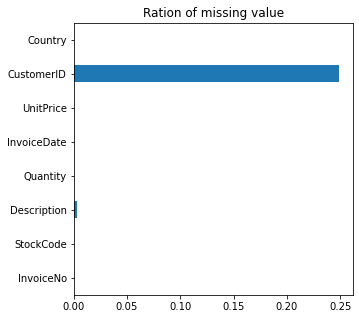

In [654]:
plt.figure(figsize = (5, 5)) 
df.isnull().mean(axis=0).plot.barh()
plt.title("Ration of missing value")

##### The missing values are only in the CustomerID column and the description column

#### 2. Check if any column have a single value

In [655]:
print(df.nunique())

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


##### There are no single value in datasets

#### 3. Check if there are any missing value

In [656]:
duplicateRowsDF = df[df.duplicated()]

In [657]:
print("Duplicate Rows based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows based on all columns are :
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID        

##### There are 5268 duplicated rows

In [658]:
df.drop_duplicates(inplace = True)

In [659]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


#### 4. Drop customer id since it not necessary for clustering and it contains many missing value

In [660]:
null_data = df[df['Description'].isnull()]
null_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [661]:
df['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 536641, dtype: object

#### check cancelled orders

In [662]:
x = df['InvoiceNo'].str.contains('C')
x.fillna(0, inplace=True)

In [663]:
x = x.astype(int)

In [664]:
x.value_counts()

0    527390
1      9251
Name: InvoiceNo, dtype: int64

In [665]:
df['order_canceled'] = x
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
330822,565927,82613D,METAL SIGN CUPCAKE SINGLE HOOK,8,2011-09-08 10:08:00,1.25,NaN,EIRE,0
470744,576618,22423,REGENCY CAKESTAND 3 TIER,1,2011-11-15 17:00:00,24.96,NaN,United Kingdom,0
361292,568346,21466,RED FLOWER CROCHET FOOD COVER,1,2011-09-26 15:28:00,7.46,14096.0,United Kingdom,0
464778,576181,22577,WOODEN HEART CHRISTMAS SCANDINAVIAN,12,2011-11-14 11:19:00,0.29,15572.0,United Kingdom,0
346038,567183,23005,TRAVEL CARD WALLET I LOVE LONDON,3,2011-09-18 15:32:00,0.42,14769.0,United Kingdom,0
158897,550319,84997D,CHILDRENS CUTLERY POLKADOT PINK,6,2011-04-17 12:37:00,4.15,14524.0,United Kingdom,0
61926,541491,21137,BLACK RECORD COVER FRAME,8,2011-01-18 14:04:00,3.75,12510.0,Spain,0
47817,540418,90214K,"LETTER ""K"" BLING KEY RING",1,2011-01-07 11:04:00,0.85,NaN,United Kingdom,0
156653,550157,22241,GARLAND WOODEN HAPPY EASTER,2,2011-04-14 15:26:00,1.25,16393.0,United Kingdom,0
293846,562649,22826,LOVE SEAT ANTIQUE WHITE METAL,1,2011-08-08 13:11:00,85.00,14606.0,United Kingdom,0


In [666]:
df['order_canceled'].value_counts()

0    527390
1      9251
Name: order_canceled, dtype: int64

In [667]:
n1 = df['order_canceled'].value_counts()[1]
n2 = len(df.index)
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))


Number of orders canceled: 9251/536641 (1.72%) 


In [668]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


In [669]:
df[df['order_canceled']==1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,1
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,1


In [670]:
df = df[df['CustomerID'].notna()]
df['CustomerID'] = df['CustomerID'].astype("int")

In [671]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0


In [672]:
df.reset_index(drop=True,inplace=True)

#### Checking if it has negative quantities.

In [673]:
len(df.loc[df['Quantity'] < 0,:])

8872

In [674]:
df.loc[df['Quantity'] < 0,:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
401159,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,1
401243,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,1
401410,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,1
401411,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,1


In [675]:
df.isnull().any()

InvoiceNo         False
StockCode         False
Description       False
Quantity          False
InvoiceDate       False
UnitPrice         False
CustomerID        False
Country           False
order_canceled    False
dtype: bool

In [676]:
df.reset_index(drop=True,inplace=True)

In [677]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       401604 non-null  object        
 1   StockCode       401604 non-null  object        
 2   Description     401604 non-null  object        
 3   Quantity        401604 non-null  int64         
 4   InvoiceDate     401604 non-null  datetime64[ns]
 5   UnitPrice       401604 non-null  float64       
 6   CustomerID      401604 non-null  int32         
 7   Country         401604 non-null  object        
 8   order_canceled  401604 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(4)
memory usage: 24.5+ MB


# 3. Exploratory Data

## 3.1 Countries

In [678]:
df.Country.nunique()

37

In [679]:
customer_country=df[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


In [680]:
n1 = df[df['Country'] == 'United Kingdom'].value_counts('Country').sum()
n2 = len(df['Country'])
n1
print('Number of customers from UK: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of customers from UK: 356728/401604 (88.83%) 


In [681]:
temp = df.groupby(['Country'],as_index=False).agg({'InvoiceNo':'nunique'}).rename(columns = {'InvoiceNo':'Orders'})
total = temp['Orders'].sum(axis=0)
temp['%Orders'] = round((temp['Orders']/total)*100,4)

In [682]:
temp.sort_values(by=['%Orders'],ascending=False,inplace=True)
temp.reset_index(drop=True,inplace=True)

Text(0, 0.5, '%Orders')

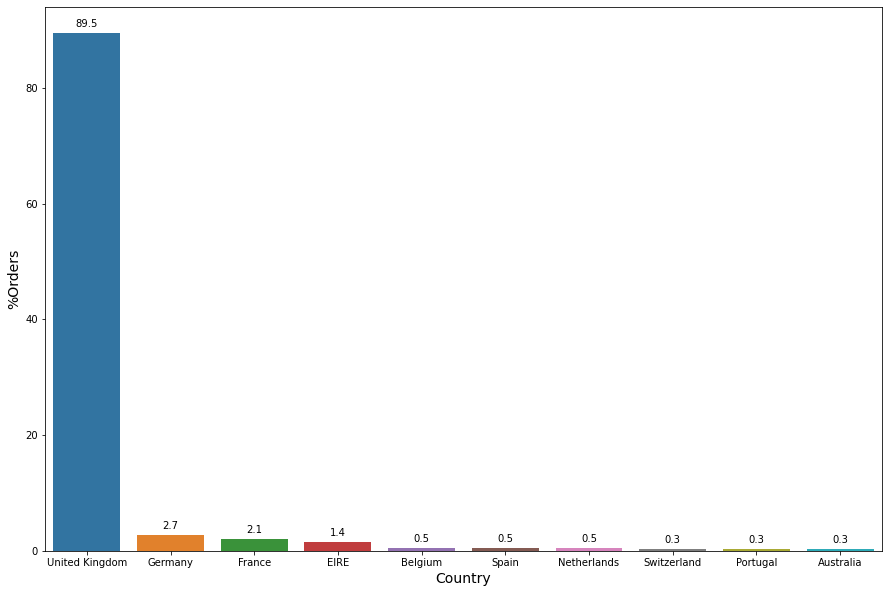

In [683]:
plt.figure(figsize=(15,10))
splot=sns.barplot(x="Country",y="%Orders",data=temp[:10])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Country", size=14)
plt.ylabel("%Orders", size=14)

##### Almost 90% of the data is coming from UK !

## 3.2 Quantity

In [684]:
df['Quantity'].describe()

count    401604.000000
mean         12.183273
std         250.283037
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [685]:
df[(df['Quantity']<0)].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,1


#### The Quantity is seem good to go

## 3.3 Stock Code

In [686]:
df['StockCode'].sample(20)

214824     23302
250752     22551
392756    15044D
96539      22986
290048     71053
160086     37448
389301     21479
149287    84884A
254133     22671
120213     21498
317693     23534
333149     21035
352086     23308
268133     22699
400875     21417
366838     22578
337765     22090
97595      22559
177650     22693
113116     23201
Name: StockCode, dtype: object

In [687]:
len(df['StockCode'].unique())

3684

### found some special code

In [688]:
list_special_codes = df[df['StockCode'].str.contains('^[a-zA-Z]+', na=False)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [689]:
df[df['StockCode'] == 'POST']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583,France,0
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791,Netherlands,0
1097,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662,Germany,0
3789,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738,Germany,0
3968,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686,France,0
...,...,...,...,...,...,...,...,...,...
401177,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423,Belgium,0
401195,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518,Germany,0
401425,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662,Germany,0
401462,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526,Germany,0


In [690]:
df[df['StockCode'] == 'BANK CHARGES']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
3158,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.000,15823,United Kingdom,0
37886,541505,BANK CHARGES,Bank Charges,1,2011-01-18 15:58:00,15.000,15939,United Kingdom,0
104648,549717,BANK CHARGES,Bank Charges,1,2011-04-11 14:56:00,15.000,14606,United Kingdom,0
121491,551945,BANK CHARGES,Bank Charges,1,2011-05-05 11:09:00,15.000,16714,United Kingdom,0
235306,565735,BANK CHARGES,Bank Charges,1,2011-09-06 12:25:00,15.000,16904,United Kingdom,0
262731,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,15.000,13405,United Kingdom,0
262732,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405,United Kingdom,0
300216,571900,BANK CHARGES,Bank Charges,1,2011-10-19 14:26:00,15.000,13263,United Kingdom,0
319837,573586,BANK CHARGES,Bank Charges,1,2011-10-31 14:48:00,15.000,14704,United Kingdom,0
327551,574546,BANK CHARGES,Bank Charges,1,2011-11-04 14:59:00,15.000,13651,United Kingdom,0


## 3.4 InvoiceNo - Cancelation Code

In [691]:
# Constucting a basket for later use
temp = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})

In [692]:
nb_products_per_basket.InvoiceNo = nb_products_per_basket.InvoiceNo.astype(str)
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))
len(nb_products_per_basket[nb_products_per_basket['order_canceled']==1])/len(nb_products_per_basket)*100

16.466876971608833

##### After drop some datas it still appears that more than 16% of the transactions were canceled. Let's take a look at some rows where the transaction was canceled.

In [693]:
nb_products_per_basket[nb_products_per_basket['order_canceled']==1][:5]

,CustomerID,InvoiceNo,Number of products,order_canceled
1,12346,C541433,1,1
23,12352,C545329,2,1
24,12352,C545330,1,1
25,12352,C547388,7,1
39,12359,C549955,2,1


In [694]:
df[df['CustomerID'] == 12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
37511,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,0
37516,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,1


##### Look like it's a duplicate of the canceled transaction in the data. Let's see if this is always the case.

In [695]:
test = df[df['Quantity'] < 0][['CustomerID','Quantity',
                                                   'StockCode','Description','UnitPrice']]
for index, col in  test.iterrows():
    if df[(df['CustomerID'] == col[0]) & (df['Quantity'] == -col[1]) 
                & (df['Description'] == col[3])].shape[0] == 0: 
        print(test.loc[index])
        print('It is not always the case')
        break

CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
It is not always the case


In [696]:
df[df['CustomerID'] == 14527].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,1
6521,537159,22112,CHOCOLATE HOT WATER BOTTLE,6,2010-12-05 13:17:00,4.95,14527,United Kingdom,0
6522,537159,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-05 13:17:00,4.95,14527,United Kingdom,0
6523,537159,21479,WHITE SKULL HOT WATER BOTTLE,1,2010-12-05 13:17:00,3.75,14527,United Kingdom,0
6524,537159,22114,HOT WATER BOTTLE TEA AND SYMPATHY,6,2010-12-05 13:17:00,3.95,14527,United Kingdom,0


##### It appears that when there is a discount there are no duplicate. Let's try without the discount values

In [697]:
data_check = df[(df['Quantity'] < 0) & (df['Description'] != 'Discount')][
                                 ['CustomerID','Quantity','StockCode',
                                  'Description','UnitPrice']]

for index, col in  data_check.iterrows():
    if df[(df['CustomerID'] == col[0]) & (df['Quantity'] == -col[1]) 
                & (df['Description'] == col[3])].shape[0] == 0: 
        print('Index :', index)
        print(data_check.loc[index])
        print('The second test is also not the case')
        break

Index : 154
CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
The second test is also not the case


In [698]:
df[(df['CustomerID'] == 15311) & (df['Description'] == 'SET OF 3 COLOURED  FLYING DUCKS')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,1
6750,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311,United Kingdom,0
11855,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311,United Kingdom,1
18214,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13 15:07:00,4.65,15311,United Kingdom,0
25143,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311,United Kingdom,1
27303,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-05 11:41:00,4.65,15311,United Kingdom,0
37034,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-17 13:39:00,4.65,15311,United Kingdom,0
48630,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2011-02-01 12:14:00,4.65,15311,United Kingdom,1


##### So cancel order is just a part of the transaction

## 3.5. UnitPrice

In [699]:
df.describe()

,Quantity,UnitPrice,CustomerID,order_canceled
count,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,0.022091
std,250.283037,69.764035,1714.006089,0.146981
min,-80995.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13939.000000,0.000000
50%,5.000000,1.950000,15145.000000,0.000000
75%,12.000000,3.750000,16784.000000,0.000000
max,80995.000000,38970.000000,18287.000000,1.000000


##### The minimum value for the unitprice is 0.

In [700]:
df[(df['UnitPrice'] == 0)].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
6842,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,0
22619,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0
25551,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,0
29374,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0
29376,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0


##### it might be a special discount or something else so I'll leave it like that.

# 4.Feature engineering

In [701]:
def unique_counts(df):
   for i in df.columns:
       count = df[i].nunique()
       print(i, ": ", count)
unique_counts(df)

InvoiceNo :  22190
StockCode :  3684
Description :  3896
Quantity :  436
InvoiceDate :  20460
UnitPrice :  620
CustomerID :  4372
Country :  37
order_canceled :  2


## 4.1 Total price

In [702]:
# Total price feature
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']

In [703]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
...,...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0,10.20
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0,12.60
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0,16.60
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0,16.60


In [704]:
# Total price feature

Text(0.5, 1.0, 'Revenue per Country')

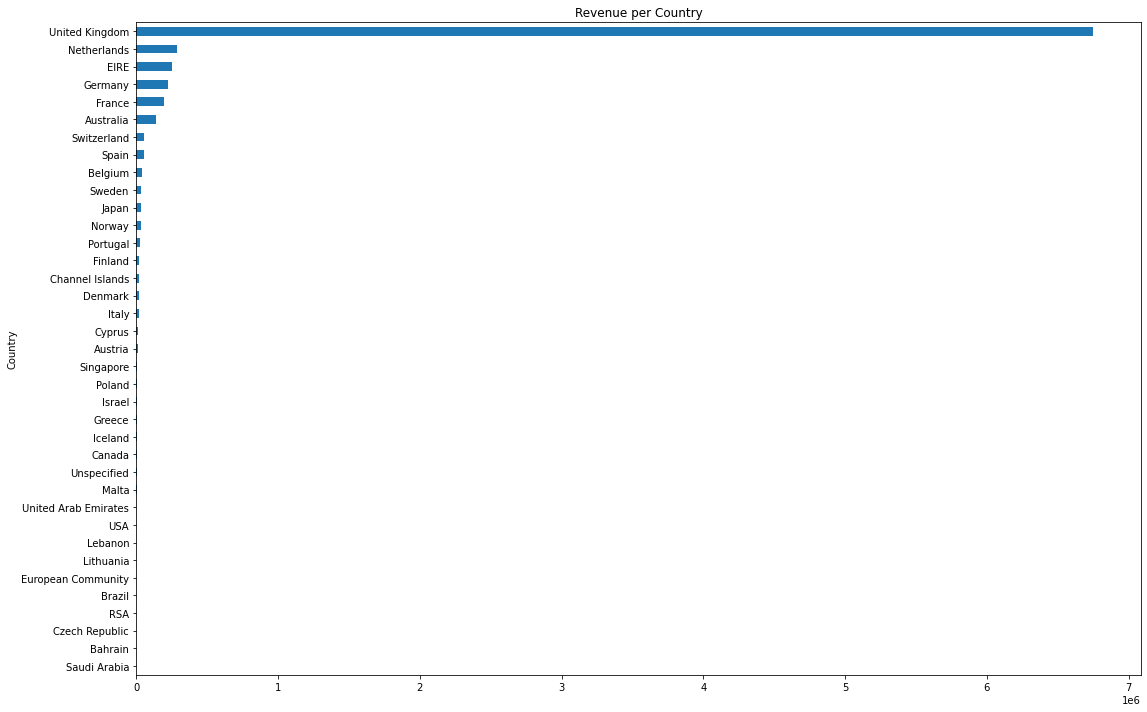

In [705]:
revenue_per_countries = df.groupby(["Country"])["TotalPrice"].sum().sort_values()
revenue_per_countries.plot(kind='barh', figsize=(18,12))
plt.title("Revenue per Country")

Text(0.5, 1.0, 'Number of Invoices per Country')

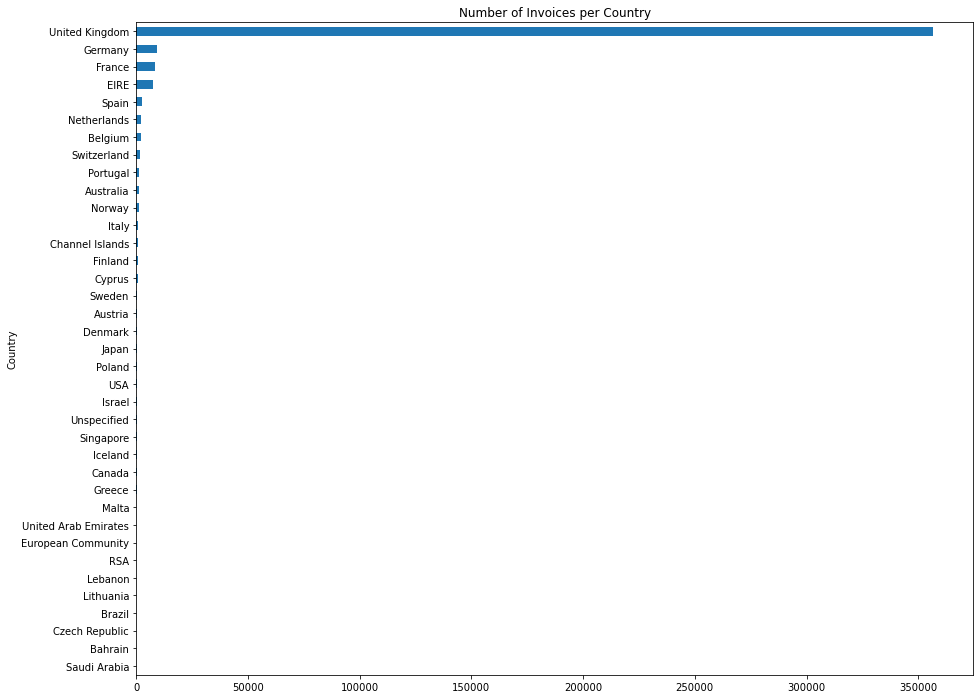

In [706]:
No_invoice_per_country = df.groupby(["Country"])["InvoiceNo"].count().sort_values()
No_invoice_per_country.plot(kind='barh', figsize=(15,12))
plt.title("Number of Invoices per Country")

## 4.2 Country

In [707]:
le = LabelEncoder()
le.fit(df['Country'])

LabelEncoder()

In [708]:
l = [i for i in range(37)]
dict(zip(list(le.classes_), l))

{'Australia': 0,
 'Austria': 1,
 'Bahrain': 2,
 'Belgium': 3,
 'Brazil': 4,
 'Canada': 5,
 'Channel Islands': 6,
 'Cyprus': 7,
 'Czech Republic': 8,
 'Denmark': 9,
 'EIRE': 10,
 'European Community': 11,
 'Finland': 12,
 'France': 13,
 'Germany': 14,
 'Greece': 15,
 'Iceland': 16,
 'Israel': 17,
 'Italy': 18,
 'Japan': 19,
 'Lebanon': 20,
 'Lithuania': 21,
 'Malta': 22,
 'Netherlands': 23,
 'Norway': 24,
 'Poland': 25,
 'Portugal': 26,
 'RSA': 27,
 'Saudi Arabia': 28,
 'Singapore': 29,
 'Spain': 30,
 'Sweden': 31,
 'Switzerland': 32,
 'USA': 33,
 'United Arab Emirates': 34,
 'United Kingdom': 35,
 'Unspecified': 36}

In [709]:
df['Country'] = le.transform(df['Country'])

In [710]:
with open('labelencoder.pickle', 'wb') as g:
    pickle.dump(le, g)

In [711]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,35,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,35,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,35,0,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,35,0,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,35,0,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,35,0,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,35,0,54.08


## 4.2. Convert to Customer based (Aggreegate DATA - RFM Concept)

#### The RFM model is based on three quantitative factors:
##### Recency: How recently a customer has made a purchase
##### Frequency: How often a customer makes a purchase
##### Monetary Value: How much money a customer spends on purchases

#### Full Article : https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp

##### Let us check the distribution of the TotalSum column to understand customer spending.

<AxesSubplot:>

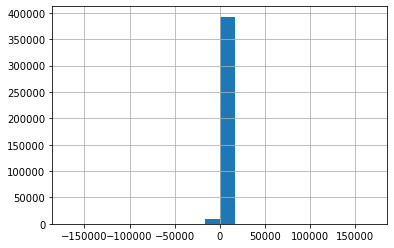

In [712]:
df.TotalPrice.hist(bins=20)

In [713]:
df[['TotalPrice']].describe()

,TotalPrice
count,401604.000000
mean,20.613638
std,430.352218
min,-168469.600000
25%,4.250000
50%,11.700000
75%,19.800000
max,168469.600000


In [714]:
df[df['TotalPrice']> 19.800000].sort_values('TotalPrice',ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled,TotalPrice
401131,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,35,0,168469.60
37511,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,35,0,77183.60
157405,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,35,0,38970.00
119907,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,35,0,8142.75
252000,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450,35,0,7144.72
...,...,...,...,...,...,...,...,...,...,...
348174,576339,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,3,2011-11-14 15:27:00,6.63,14096,35,0,19.89
347937,576339,21035,SET/2 RED RETROSPOT TEA TOWELS,3,2011-11-14 15:27:00,6.63,14096,35,0,19.89
347910,576339,20682,RED RETROSPOT CHILDRENS UMBRELLA,3,2011-11-14 15:27:00,6.63,14096,35,0,19.89
326061,574355,23403,LETTER HOLDER HOME SWEET HOME,8,2011-11-04 10:48:00,2.48,18102,35,0,19.84


##### Let check the max date and take data till a year behind the max date.

In [715]:
all_dates = (pd.to_datetime(df['InvoiceDate'])).apply(lambda x:x.date())

In [716]:
start_date = all_dates.max() - relativedelta(months=12, days=-1)
print('Start date: {}'.format(start_date))
print('End date: {}'.format(all_dates.max()))

Start date: 2010-12-10
End date: 2011-12-09


In [717]:
data_rfm = df[df['InvoiceDate'] >= pd.to_datetime(start_date)]
data_rfm.reset_index(drop=True,inplace=True)
data_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled,TotalPrice
0,538172,21562,HAWAIIAN GRASS SKIRT,12,2010-12-10 09:33:00,1.25,15805,35,0,15.0
1,538172,79321,CHILLI LIGHTS,8,2010-12-10 09:33:00,4.95,15805,35,0,39.6
2,538172,22041,"RECORD FRAME 7"" SINGLE SIZE",12,2010-12-10 09:33:00,2.55,15805,35,0,30.6
3,538172,84558A,3D DOG PICTURE PLAYING CARDS,12,2010-12-10 09:33:00,2.95,15805,35,0,35.4
4,538172,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,2010-12-10 09:33:00,0.55,15805,35,0,13.2


In [718]:
snapshot_date = max(data_rfm.InvoiceDate) + dt.timedelta(days=1)
print('Snapshot date: {}'.format(snapshot_date.date()))

Snapshot date: 2011-12-10


In [719]:
# Aggregate data on a customer level
data = data_rfm.groupby(['CustomerID'],as_index=False).agg(Recency = ('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
                                                           Frequency = ('InvoiceNo', 'count'),
                                                           MonetaryValue = ('TotalPrice', 'sum'),
                                                           AgeOnPlatform = ('InvoiceDate', lambda x: (snapshot_date - x.min()).days),
                                                           NumberOfCancel = ('order_canceled', 'sum')
                                                          )

# Check the first rows
data.head()

,CustomerID,Recency,Frequency,MonetaryValue,AgeOnPlatform,NumberOfCancel
0,12346,326,2,0.00,326,1
1,12347,2,151,3598.21,317,0
2,12348,75,31,1797.24,358,0
3,12349,19,73,1757.55,19,0
4,12350,310,17,334.40,310,0


In [720]:
data[data['NumberOfCancel']>1]

,CustomerID,Recency,Frequency,MonetaryValue,AgeOnPlatform,NumberOfCancel
5,12352,36,95,1.545410e+03,297,10
12,12359,8,251,6.182980e+03,332,6
15,12362,3,274,5.154580e+03,296,8
30,12381,5,91,1.803960e+03,120,4
32,12384,29,30,5.661600e+02,122,3
...,...,...,...,...,...,...
4277,18260,173,139,2.580150e+03,358,6
4284,18270,38,13,2.389500e+02,267,2
4285,18272,3,170,3.064780e+03,247,4
4287,18274,18,22,1.243450e-14,30,11


In [721]:
data_rfm[data_rfm['order_canceled']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled,TotalPrice
1050,C538314,22586,FELTCRAFT HAIRBAND PINK AND BLUE,-47,2010-12-10 13:52:00,0.85,15514,35,1,-39.95
1073,C538341,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,-1,2010-12-10 14:03:00,1.25,15514,35,1,-1.25
1074,C538341,22988,SOLDIERS EGG CUP,-36,2010-12-10 14:03:00,1.25,15514,35,1,-45.00
1075,C538341,22988,SOLDIERS EGG CUP,-12,2010-12-10 14:03:00,1.25,15514,35,1,-15.00
1076,C538341,22976,CIRCUS PARADE CHILDRENS EGG CUP,-12,2010-12-10 14:03:00,1.25,15514,35,1,-15.00
...,...,...,...,...,...,...,...,...,...,...
386676,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,35,1,-9.13
386760,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,35,1,-224.69
386927,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,35,1,-54.75
386928,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,35,1,-1.25


In [722]:
# # Aggregate data on a customer level
# data = data_rfm.groupby(['CustomerID'],as_index=False).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
#                                              'InvoiceNo': 'count',
#                                              'TotalPrice': 'sum'
#                                              }).rename(columns = {'InvoiceDate': 'Recency',
#                                                                                    'InvoiceNo': 'Frequency',
#                                                                                    'TotalPrice': 'MonetaryValue',
#                                                                                     })

# # Check the first rows
# data.head()

In [723]:
data_rfm[data_rfm['CustomerID'] == 12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled,TotalPrice
23028,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,35,0,77183.6
23033,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,35,1,-77183.6


In [724]:
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(data['Recency'], 4, labels = r_labels)
data = data.assign(R = r_quartiles.values)

f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(data['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(data['MonetaryValue'], 4, labels = m_labels)
data = data.assign(F = f_quartiles.values)
data = data.assign(M = m_quartiles.values)
data.head()

,CustomerID,Recency,Frequency,MonetaryValue,AgeOnPlatform,NumberOfCancel,R,F,M
0,12346,326,2,0.00,326,1,1,1,1
1,12347,2,151,3598.21,317,0,4,4,4
2,12348,75,31,1797.24,358,0,2,2,4
3,12349,19,73,1757.55,19,0,3,3,4
4,12350,310,17,334.40,310,0,1,1,2


In [725]:
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

data['RFM_Segment'] = data.apply(join_rfm, axis=1)
data['RFM_Score'] = data[['R','F','M']].sum(axis=1)
data.head()

,CustomerID,Recency,Frequency,MonetaryValue,AgeOnPlatform,NumberOfCancel,R,F,M,RFM_Segment,RFM_Score
0,12346,326,2,0.00,326,1,1,1,1,1.01.01.0,3
1,12347,2,151,3598.21,317,0,4,4,4,4.04.04.0,12
2,12348,75,31,1797.24,358,0,2,2,4,2.02.04.0,8
3,12349,19,73,1757.55,19,0,3,3,4,3.03.04.0,10
4,12350,310,17,334.40,310,0,1,1,2,1.01.02.0,4


##### RFM Score distribution and their groups.

In [726]:
data.groupby('RFM_Score').agg({'Recency': 'mean',
                                   'Frequency': 'mean',
                                   'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           247.7       7.9         106.0   389
4           163.2      13.8         220.3   377
5           146.7      20.5         348.3   503
6            85.8      27.5         482.0   459
7            80.9      39.6         718.8   447
8            56.3      53.4         953.5   453
9            44.3      76.9        1338.7   410
10           30.3     111.8        1808.0   436
11           19.9     188.2        3856.7   357
12            6.7     358.0        8574.5   465

In [727]:
def create_segment(df):
    if df['RFM_Score'] >= 9:
        return 'Top'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Middle'
    else:
        return 'Low'
    
data['General_Segment'] = data.apply(create_segment, axis=1)
data.groupby('General_Segment').agg({'Recency': 'mean',
                                         'Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low               206.1      10.8         162.2   766
Middle             93.9      34.8         617.4  1862
Top                24.9     188.2        4017.5  1668

# 5. Data Preprocessing

#### prepare the data for Kmeans clustering on RFM Score data

<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

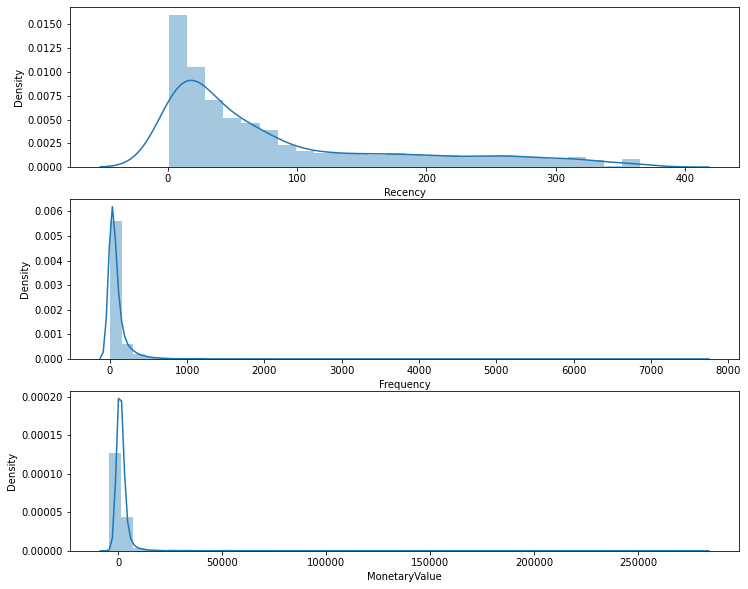

In [728]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))

# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(data['Recency'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(data['Frequency'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(data['MonetaryValue'])


##### Use log transformation to unskew the data

In [729]:
# Checking for constant mean and variance.
data[['Recency','Frequency','MonetaryValue']].describe()

,Recency,Frequency,MonetaryValue
count,4296.000000,4296.000000,4296.000000
mean,87.132914,90.111965,1856.405425
std,94.570647,224.502943,7994.597360
min,1.000000,1.000000,-4287.630000
25%,17.000000,17.000000,289.157500
50%,47.000000,41.000000,640.980000
75%,134.000000,97.000000,1577.710000
max,365.000000,7623.000000,279489.020000


In [730]:
data[data['MonetaryValue'] < 0]

,CustomerID,Recency,Frequency,MonetaryValue,AgeOnPlatform,NumberOfCancel,R,F,M,RFM_Segment,RFM_Score,General_Segment
88,12454,53,30,-5.684342e-14,56,15,2,2,1,2.02.01.0,5,Middle
124,12503,338,1,-1.126000e+03,338,1,1,1,1,1.01.01.0,3,Low
126,12505,301,1,-4.500000e+00,301,1,1,1,1,1.01.01.0,3,Low
262,12666,359,2,-2.274400e+02,359,2,1,1,1,1.01.01.0,3,Low
331,12755,250,5,-1.591200e+03,281,2,1,1,1,1.01.01.0,3,Low
358,12797,360,4,-5.985000e+01,360,4,1,1,1,1.01.01.0,3,Low
459,12943,301,1,-3.750000e+00,301,1,1,1,1,1.01.01.0,3,Low
476,12967,3,18,-1.736500e+02,358,14,4,2,1,4.02.01.0,7,Middle
608,13154,144,1,-6.118600e+02,144,1,1,1,1,1.01.01.0,3,Low
767,13369,354,5,-4.453000e+01,354,5,1,1,1,1.01.01.0,3,Low


In [731]:
data = data[data['MonetaryValue'] > 0]
data.reset_index(drop=True,inplace=True)


In [732]:
data[data['MonetaryValue'] > 0].tail(10)

,CustomerID,Recency,Frequency,MonetaryValue,AgeOnPlatform,NumberOfCancel,R,F,M,RFM_Segment,RFM_Score,General_Segment
4238,18273,2,3,2.040000e+02,258,0,4,1,1,4.01.01.0,6,Middle
4239,18274,18,22,1.243450e-14,30,11,3,2,1,3.02.01.0,6,Middle
4240,18276,21,16,3.233600e+02,44,2,3,1,2,3.01.02.0,6,Middle
4241,18277,58,9,9.763000e+01,319,1,2,1,1,2.01.01.0,4,Low
4242,18278,74,9,1.739000e+02,74,0,2,1,1,2.01.01.0,4,Low
4243,18280,278,10,1.806000e+02,278,0,1,1,1,1.01.01.0,3,Low
4244,18281,181,7,8.082000e+01,181,0,1,1,1,1.01.01.0,3,Low
4245,18282,8,13,1.766000e+02,126,1,4,1,1,4.01.01.0,6,Middle
4246,18283,4,721,2.045530e+03,337,0,4,4,4,4.04.04.0,12,Top
4247,18287,43,70,1.837280e+03,202,0,3,3,4,3.03.04.0,10,Top


In [733]:
data = data.drop([4239, 1031, 752, 207, 165])
data.reset_index(drop=True,inplace=True)

In [734]:
raw_data = data[['Recency','Frequency','MonetaryValue']]

In [735]:
raw_data

,Recency,Frequency,MonetaryValue
0,2,151,3598.21
1,75,31,1797.24
2,19,73,1757.55
3,310,17,334.40
4,36,95,1545.41
...,...,...,...
4238,278,10,180.60
4239,181,7,80.82
4240,8,13,176.60
4241,4,721,2045.53


In [736]:
# Unskew the data
data_log = np.log(raw_data)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(data_log)

# Scale and center the data
data_normalized = scaler.transform(data_log)

# Create a pandas DataFrame
data_norm = pd.DataFrame(data=data_log, index=raw_data.index, columns=raw_data.columns)

In [737]:
data_normalized

array([[-2.06693415,  1.01758667,  1.31507212],
       [ 0.44158556, -0.20152762,  0.75689281],
       [-0.50874468,  0.45794462,  0.73893662],
       ...,
       [-1.10743646, -0.87067522, -1.10866795],
       [-1.58718531,  2.22135256,  0.86094451],
       [ 0.05656124,  0.42563275,  0.77460994]])

In [738]:
data_log.tail(10)

,Recency,Frequency,MonetaryValue
4233,1.098612,5.135798,8.027731
4234,0.693147,1.098612,5.318120
4235,3.044522,2.772589,5.778766
4236,4.060443,2.197225,4.581185
4237,4.304065,2.197225,5.158480
4238,5.627621,2.302585,5.196285
4239,5.198497,1.945910,4.392224
4240,2.079442,2.564949,5.173887
4241,1.386294,6.580639,7.623412
4242,3.761200,4.248495,7.516041


In [739]:
data_norm[data_norm['MonetaryValue'] < 0]

,Recency,Frequency,MonetaryValue


In [740]:
data_norm

,Recency,Frequency,MonetaryValue
0,0.693147,5.017280,8.188192
1,4.317488,3.433987,7.494007
2,2.944439,4.290459,7.471676
3,5.736572,2.833213,5.812338
4,3.583519,4.553877,7.343045
...,...,...,...
4238,5.627621,2.302585,5.196285
4239,5.198497,1.945910,4.392224
4240,2.079442,2.564949,5.173887
4241,1.386294,6.580639,7.623412


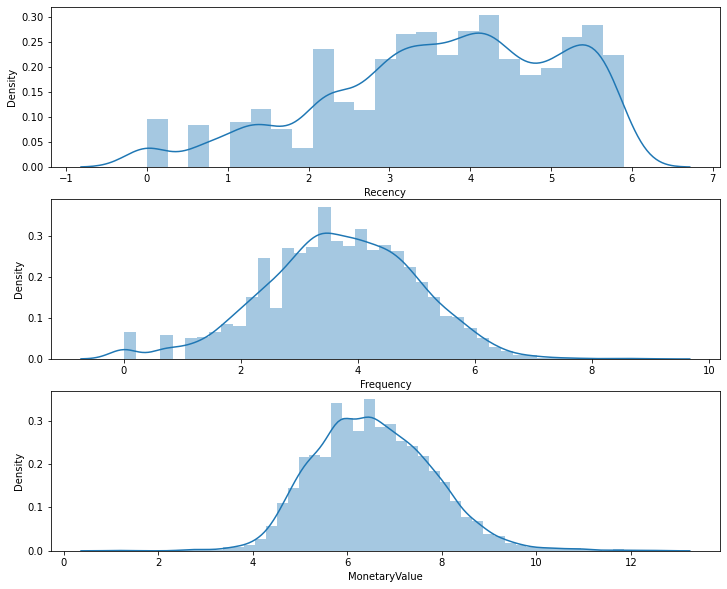

In [741]:
plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(data_norm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(data_norm['MonetaryValue'])


# Show the plot
plt.show()

##### Use elbow method to identify number of K for K-mean

In [742]:
sse = {}

# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_norm)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

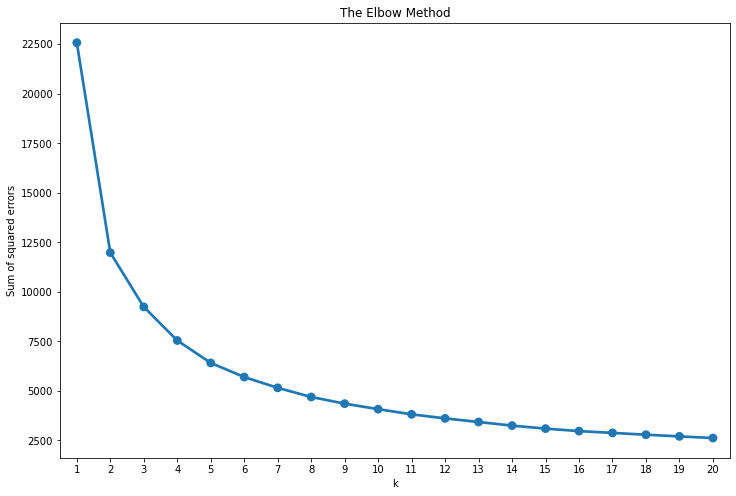

In [743]:
plt.figure(figsize=(12,8))

plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [744]:
kmeans = KMeans(n_clusters=4, random_state=1)

# Compute k-means clustering on pre-processed data
kmeans.fit(data_norm)

# Extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_

In [745]:
# Create a cluster label column in the original DataFrame
data_norm_k4 = data_norm.assign(Cluster = cluster_labels)
data_k4 = raw_data.assign(Cluster = cluster_labels)

In [746]:
data_norm_k4.index = data['CustomerID'].astype(int)

In [747]:
data_norm_k4.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12347,0.693147,5.017280,8.188192,3
12348,4.317488,3.433987,7.494007,1
12349,2.944439,4.290459,7.471676,1
12350,5.736572,2.833213,5.812338,0
12352,3.583519,4.553877,7.343045,1


In [748]:
# Melt the data into along format so RFM values and metric names are stored in 1 column each
data_melt = pd.melt(data_norm_k4.reset_index(),
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Frequency', 'MonetaryValue','Recency'],
                    var_name='Attribute',
                    value_name='Value')

In [749]:
data_melt

,CustomerID,Cluster,Attribute,Value
0,12347,3,Frequency,5.017280
1,12348,1,Frequency,3.433987
2,12349,1,Frequency,4.290459
3,12350,0,Frequency,2.833213
4,12352,1,Frequency,4.553877
...,...,...,...,...
12724,18280,0,Recency,5.627621
12725,18281,0,Recency,5.198497
12726,18282,2,Recency,2.079442
12727,18283,3,Recency,1.386294


<AxesSubplot:title={'center':'Line plot of clustering'}, xlabel='Attribute', ylabel='Value'>

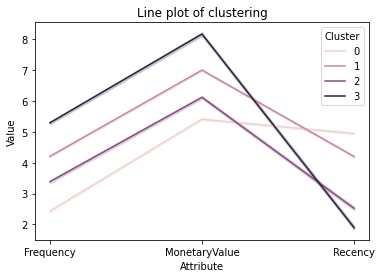

In [750]:
plt.title('Line plot of clustering')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=data_melt)